# Introudction to Regression with Neural Netowrks in Tensorflow

Many definitions for regression problems. We will simplify: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


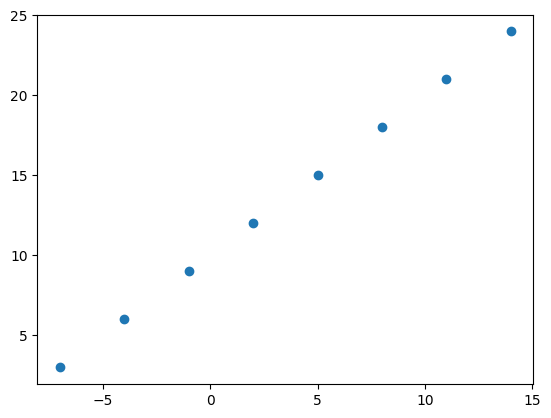

In [2]:
# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3.0, 6., 9., 12., 15., 18., 21., 24])

# Visualize
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [5]:
X[0].ndim

0

In [6]:
X[0], y[0]

(-7.0, 3.0)

#### OLD
Fit the model

`model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+`
 
#### New
Fit the model

`model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line`

In [7]:
# Turn our numpy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float16)
y = tf.cast(tf.constant(y), dtype=tf.float16)

X, y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (i.e., words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metric (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

Mean Absolute Error:

$MAE = \frac{\sum_{i=1}^{n}{|y_i-x_i|}}{n}=\frac{\sum_{i=1}^{n}{|e_i|}}{n}$

Where $y_i$ is the prediction and $x_i$ is the true value.

`loss = mean(abs(y_true-y_pred), axis=-1)`

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                        # Input layer
])
# # Alternatively
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,             # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 475ms/step - loss: 8.4946 - mae: 8.4946
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.3621 - mae: 8.3621
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 8.2296 - mae: 8.2296
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 8.0971 - mae: 8.0971
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.9646 - mae: 7.9646


In [9]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [10]:
# Try and make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 118ms/step


array([[27.336857]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Rebuilding the model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 379ms/step - loss: 9.2186 - mae: 9.2186
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0861 - mae: 9.0861
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9536 - mae: 8.9536
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8211 - mae: 8.8211
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6886 - mae: 8.6886
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5561 - mae: 8.5561
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4236 - mae: 8.4236
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2911 - mae: 8.2911
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1586 - mae: 8.1586
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0261 - mae: 8.0261
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - los

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [13]:
model.predict([27.])

1/1 [==============================] - 0s 95ms/step


array([[47.042797]], dtype=float32)

In [14]:
# Rebuilding the model with Adam optimizer
# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 651ms/step - loss: 12.8047 - mae: 12.8047
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5033 - mae: 7.5033
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 6.3804 - mae: 6.3804
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 5.6500 - mae: 5.6500
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 4.7572 - mae: 4.7572
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 4.9174 - mae: 4.9174
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 3.2404 - mae: 3.2404
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 4.0593 - mae: 4.0593
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 3.0151 - mae: 3.0151
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.1185 - mae: 1.1185
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - 

In [15]:
model.predict([29.])

1/1 [==============================] - 0s 134ms/step


array([[36.209957]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak it -> repeat
```

Tweaking can be done on the following _hyperparameters_:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [16]:
# Make a bigger dataset
X = np.arange(-100.0, 100.0, 4) + np.random.normal(loc=0.0, scale=1.0, size=(50,))
X

array([-98.9316164 , -97.02949206, -92.26937378, -87.2210631 ,
       -85.93950838, -80.61527131, -73.6021171 , -71.11413612,
       -68.50723291, -62.9238201 , -60.86328964, -57.08286771,
       -52.26734842, -45.79222667, -44.73464112, -38.23109553,
       -36.10406783, -32.7383979 , -28.19769537, -24.11725077,
       -21.7571586 , -15.71721952, -10.45182532,  -6.99264355,
        -4.56134526,   1.32606786,   3.12495097,   8.25022445,
        11.52984958,  16.32349281,  20.37873843,  24.41676951,
        28.13903439,  31.85882953,  36.28485803,  40.68625515,
        44.69034153,  45.89200909,  50.77850924,  55.98874174,
        61.7688017 ,  63.4973691 ,  68.21425901,  71.56242709,
        74.48108424,  80.3261676 ,  84.49645191,  90.157702  ,
        92.19952232,  97.80705907])

In [17]:
# Make labels for the dataset
y = X + np.random.normal(loc=10.0, scale=10.0, size=(50,))
y

array([-94.50183608, -84.82704606, -70.2698362 , -73.13644257,
       -72.61691316, -68.83476965, -62.45019242, -43.91765146,
       -71.97120705, -64.63231061, -61.41064521, -35.65609714,
       -42.03396252, -22.44135503, -47.5367901 , -48.56116447,
       -27.72875797, -32.60880498, -15.99221621, -17.21508915,
       -11.31799371,   5.35182832, -10.48149425,  27.36173619,
         2.69420328,  24.12546083,  22.91252032,   5.08380876,
        34.37652152,  46.1683072 ,  35.80618958,  23.68431659,
        37.17056673,  43.70640615,  42.85338401,  51.27803291,
        55.50238785,  69.40350632,  96.21091654,  69.9129783 ,
        74.67189858,  77.2985927 ,  79.43566711,  86.31008257,
        94.88252387,  87.4708799 ,  98.91189065,  82.88339365,
        94.39685798, 103.8247813 ])

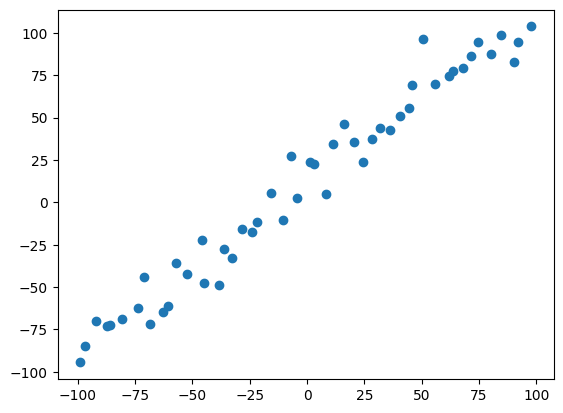

In [18]:
plt.scatter(X, y)

### The 3 sets...

* **Training set** - The model learns from this data (70-80%)
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of data.
* **Test set** - the model gets evaluated on this data to test how well it performs, typically 10-15 %

In [19]:
# Shuffle a range of indices
shuffled_indices = np.arange(len(X))
np.random.shuffle(shuffled_indices)
print(shuffled_indices)

[35 37 18 21 16  1 47 48 31 15 39 12 33  9  7  6 17 34  8 49 23 32  3 30
  2 24 10 25 42 41 14  4 38 27 45  0 44 13 26 20 11 29 28 22 40 46  5 36
 43 19]


In [20]:
# Find the last index of 80% of the data
eighty = int(np.ceil(len(shuffled_indices) * 4 / 5))
eighty

40

In [21]:
X_train = tf.constant(X[shuffled_indices[:eighty]])
y_train = tf.constant(y[shuffled_indices[:eighty]])
X_test = tf.constant(X[shuffled_indices[eighty:]])
y_test = tf.constant(y[shuffled_indices[eighty:]])

### Visualizing the data

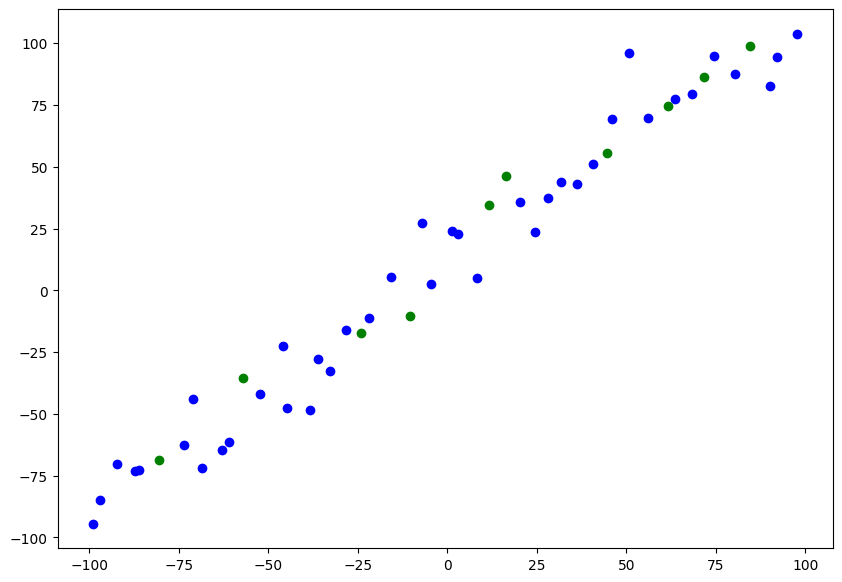

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing Data')

In [23]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100, verbose=1)

### Visualizing the model

In [24]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [40]:
# Let's create a model which builds automatically by defining the input_shape in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(1,), name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='One_of_many')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [26]:
model.summary()

Model: "One_of_many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - the parameters (patterns) that the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

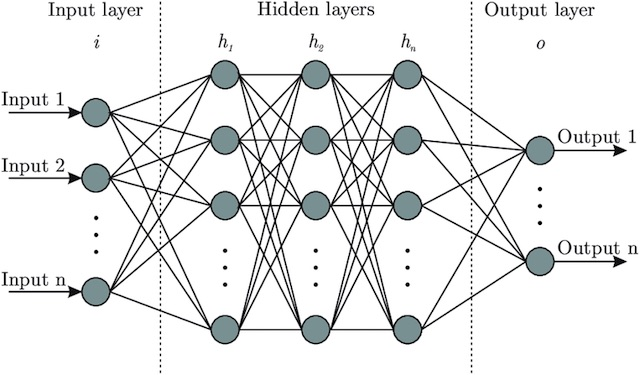

In [41]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often, you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [29]:
# Make the predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[-47.99408   ],
       [ 27.964748  ],
       [ 23.004421  ],
       [  0.25840652],
       [ 74.990265  ],
       [ 98.50822   ],
       [-72.34475   ],
       [ 57.31796   ],
       [ 85.12443   ],
       [-13.882189  ]], dtype=float32)

In [30]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    '''Plots training data, test data and compares predictions to ground truth data.'''
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    # Plot predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predicted Data', marker='^')
    # Show the legend
    plt.legend()

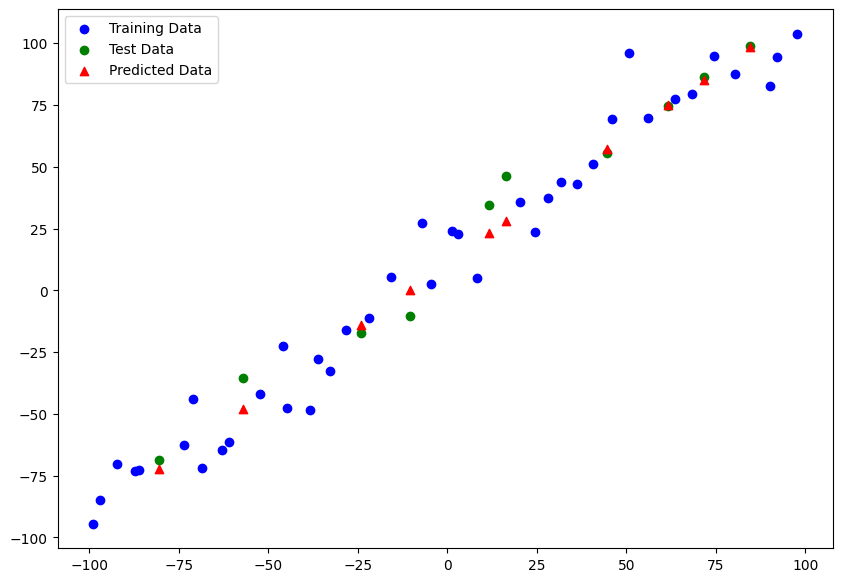

In [31]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average" how wrong is each of my models predictions'
* MSE - mean square error, "square the average error"

_**MAE - Mean Absolute Error**_

$$
MAE = \frac{\sum_{i=1}^{n}{|y_i-x_i|}}{n}=\frac{\sum_{i=1}^{n}{|e_i|}}{n}
$$

Where $y_i$ is the prediction and $x_i$ is the true value.

`loss = mean(abs(y_true-y_pred), axis=-1)`
`tf.keras.losses.MAE()`
`tf.metrics.mean_absolute_error()`

- Great starter metric for any regression problem.

_**MSE - Mean Square Error**_

$$
MSE = \frac{1}{n}\sum_{n=1}^{n}{Y_i-\hat{Y_i}}^2
$$

Where $\hat{Y_i}$ is the predicted value

`loss = mean(sum((y_true-y_pred)**2), axis=-1)`
`tf.keras.losses.MSE()`
`tf.metrics.mean_square_error()`

- When larger errors are more significant than smaller ones (because of the squaring of the $e_i$).

_**Huber**_

$$
L_{\delta}(y, f(x)) = \begin{cases}\frac{1}{2}(y-f(x))^2 \qquad\quad for |y-f(x)| \leq \delta \\ \delta|y-f(x)|-\frac{1}{2}\delta^2 \quad otherwise. \end{cases}
$$

`tf.keras.losses.Huber()`

- Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [32]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 262ms/step - loss: 6.3220 - mae: 6.3220


[6.321970462799072, 6.321970462799072]

In [33]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([78.53758 , 47.219902, 48.211967, 52.76117 , 55.66319 , 72.213585,
       98.72011 , 48.530594, 61.74369 , 56.26943 ], dtype=float32)>

In [34]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [35]:
y_pred.flatten().shape
# or tf.squeeze()

(10,)

In [36]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred.flatten())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.321969>

In [37]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred.flatten())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=75.66601>

In [47]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiment to improve our model

1. Get more data
2. Make your model larger
3. Train for longer

Let's do three modelling experiments

1. `model_1` - same as the original, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [44]:
# model_1
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model_1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 78ms/step


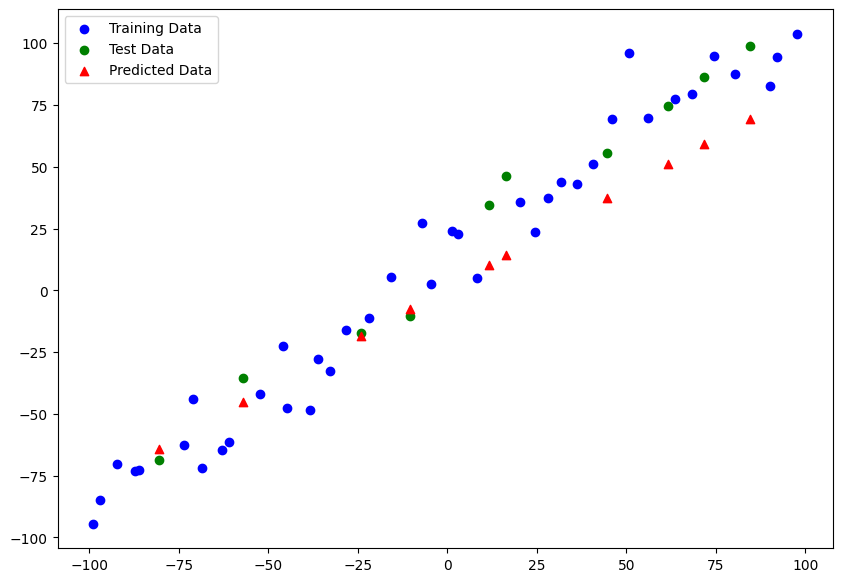

In [45]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.284458>,
 <tf.Tensor: shape=(), dtype=float32, numpy=421.31885>)

In [49]:
# 1. Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model_2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 85ms/step


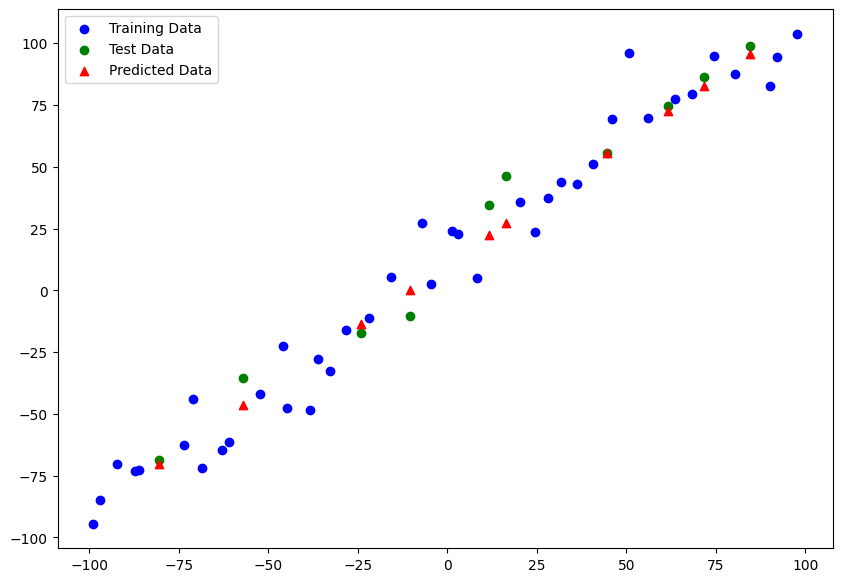

In [50]:
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=6.722602>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.21892>)

In [58]:
# 1. Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fitting the model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 33ms/step


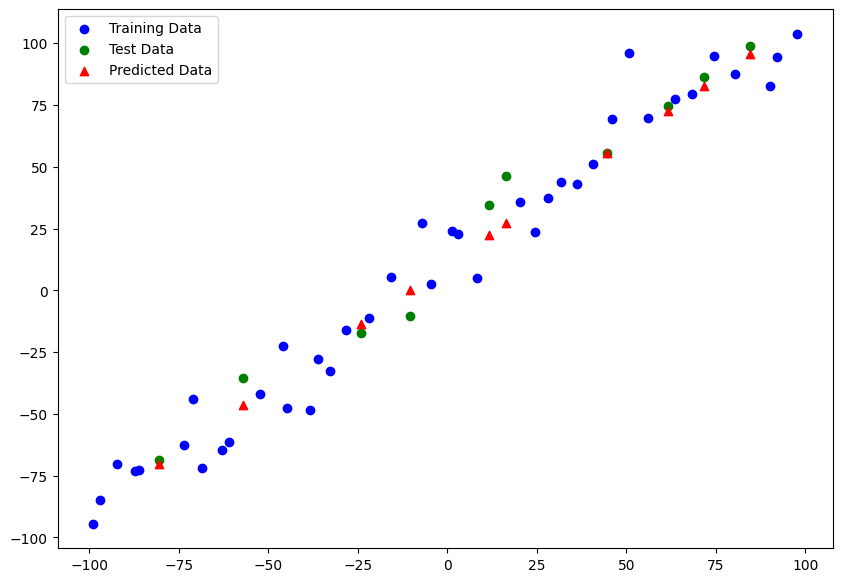

In [59]:
y_preds_3 = model.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=6.722602>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.21892>)

🔑**Note:** Start with small experiments and then improve based on that.

## Comparing the results of our experiments

In [61]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=['Model', 'MAE', 'MSE'])
all_results

,Model,MAE,MSE
0,model_1,17.284458,421.318848
1,model_2,6.722602,79.218918
2,model_3,6.722602,79.218918


## Tracking your experiments

A good habit is tracking the results of your experiments.

It can be tedious with lots of experiments.

Luckily, there are tools to helps us.

* _Tensorboard_ - helps with tracking modeeling experiments
* _Weights & Biases_ - a tool for tracking all kinds of ML experiments (plugs straight into TensorBoard)

## Saving our models

Helps store it for later use.

Formats:
* _SavedModel_ format
* _HDF5_ fromat

In [63]:
# Save model using SavedModel format
model_2.save('best_model')
model_2.save('best_model.h5')

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


## Loading our models

In [67]:
loaded_model = tf.keras.models.load_model('best_model')
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [68]:
loaded_model = tf.keras.models.load_model('best_model.h5')
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Downloading from Google Colab

In [ ]:
from google.colab import files
files.download('/content/best_model.h5')

In [70]:
!dir .

 Volume in drive C is OS
 Volume Serial Number is 3C7F-3341

 Directory of c:\Users\igari\OneDrive\Python\Tensorsss

07/03/2023  01:00 am    <DIR>          .
05/03/2023  12:37 am    <DIR>          ..
05/03/2023  12:43 am    <DIR>          .vscode
05/03/2023  06:24 pm            55,884 00_tensorflow_fundamentals.ipynb
07/03/2023  01:08 am           509,535 01_neural_network_regression_with_tensorflow.ipynb
07/03/2023  01:00 am    <DIR>          best_model
07/03/2023  01:00 am            21,952 best_model.h5
               3 File(s)        587,371 bytes
               4 Dir(s)  371,036,573,696 bytes free


## A larger dataset

In [1]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


IV: **charges**
DV: **rest**

Convert categorical variables to one-hot encoded variables

In [3]:
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
len(insurance_onehot)

1338

In [5]:
def data_sets(data: np.array, division=(80, 10, 10), shuffle=True):
    if type(data) == pd.DataFrame:
        data_copy = np.array(data.copy(deep=True))
    data_copy = data.copy()
    if shuffle:
        np.random.shuffle(data_copy)
    data_length = len(data_copy)
    sets = []
    division_indices = [0]
    # Cut the data into portions according to the specified division
    for i in range(1, len(division)+1):
        division_indices.append(
            int(np.floor(
                data_length * sum(division[:i]) / 100
            ))
        )
    print(division_indices)
    for i in range(len(division_indices)-1):
        sets.append(data_copy[division_indices[i]:division_indices[i+1]])

    return sets

In [7]:
X = insurance_onehot.drop('charges', axis=1)
y = insurance_onehot['charges']

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
# X_train, X_test = data_sets(X, division=(80, 20))
# y_train, y_test = data_sets(y, division=(80, 20))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [13]:
# Build a NN
# 1. Create model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile a model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 11009.1172 - mae: 11009.1172
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7315.4351 - mae: 7315.4351
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7107.5112 - mae: 7107.5112
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7002.8687 - mae: 7002.8687
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6958.9263 - mae: 6958.9263
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6971.8877 - mae: 6971.8877
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7011.3462 - mae: 7011.3462
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6981.0918 - mae: 6981.0918
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6935.6895 - mae: 6935.6895
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6953.7632 - mae: 6953.76

In [14]:
# Test the model
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6500.4419 - mae: 6500.4419


[6500.44189453125, 6500.44189453125]

Does not look like a good model.

In [31]:
# 1. Create insurance_model
insurance_model_2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [32]:
# Evaluate the new model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3917.9922 - mae: 3917.9922


[3917.9921875, 3917.9921875]

Create a new model and train it for longer

In [62]:
# 1. Create a new model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)]
)

In [63]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3766.8901 - mae: 3766.8901


[3766.89013671875, 3766.89013671875]

Text(0.5, 0, 'Epochs')

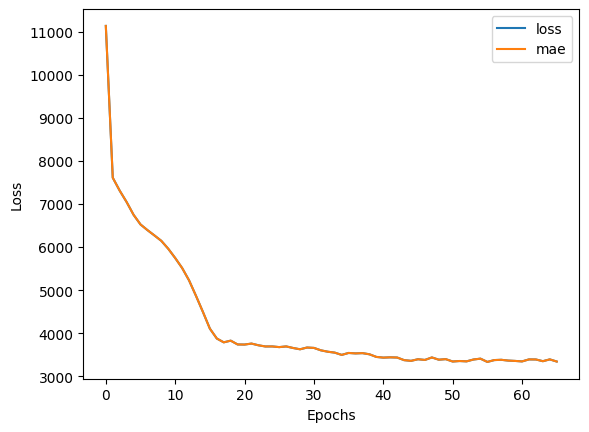

In [64]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

> How long should we train for?

Use **EarlyStopping Callback** to stop training whenever the loss stops increasing for a few epochs

## Preprocessing Data (Normalization and Standardization)

1. Turn all data into numbers (neural networks can't handle strings)

2. Make sure all of your tensors are the right shape

3. Scale features (normalize or standardize, neural networks tend to prefer normalization)

Scaling Type

* _Scale_ (also, _normalization_)
    * Converts all values to between 0 and 1 whilst preserving the original distribution
    * **Scikit-Learn**: `MinMaxScaler`
    * **Use** as default scaler with neural networks
* _Standardization_
    * Removes the mean and divides each value by the standard deviation (z-score).
    * **Scikit-Learn**: `StandardScaler`
    * **Use** when you want to transform a feature to have close to a normal distribution (caution: this reduces the effect of outliers)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
def min_max_scaler(data):
    return data / data.max()


def standardize(data):
    return data / data.std(axis=1)

# print(min_max_scaler(insurance['bmi']))

<AxesSubplot: ylabel='Frequency'>

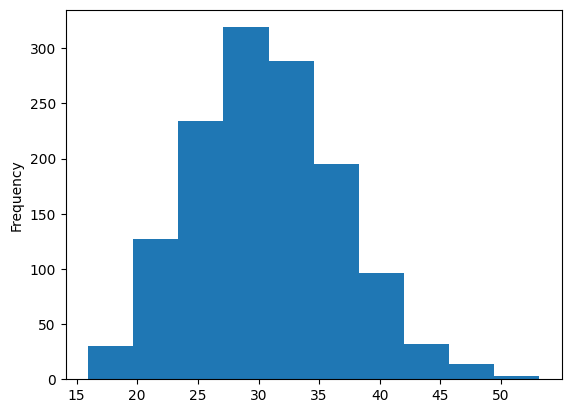

In [72]:
insurance['bmi'].plot(kind='hist')

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([0.30039526, 0.37035573, 0.44031621, 0.51027668, 0.58023715,
        0.65019763, 0.7201581 , 0.79011858, 0.86007905, 0.93003953,
        1.        ]),
 <BarContainer object of 10 artists>)

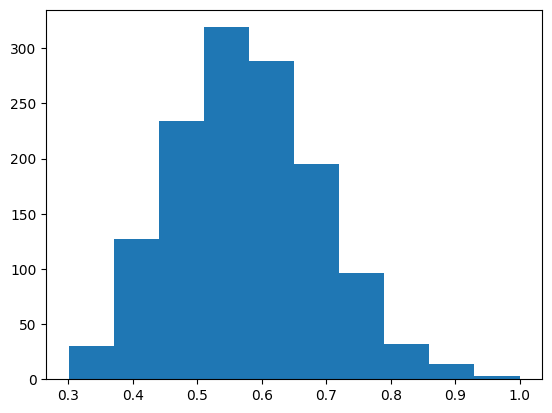

In [69]:
plt.hist(min_max_scaler(insurance['bmi']))

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ('age', 'bmi', 'children',)),
    (OneHotEncoder(handle_unknown='ignore'), ('sex', 'smoker', 'region'))
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Fit the column transformer to our data
ct.fit(X)

# Transform data with MinMaxScaler and OneHotEncoder
X = ct.transform(X)

# Create test & train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

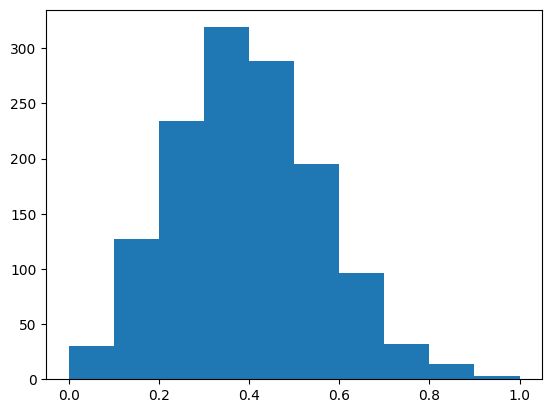

In [79]:
plt.hist(X[:,1])

In [116]:
# Building a model but using normalized data
# 1. Build model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_4.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=0,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='mae', patience=10, restore_best_weights=True)]
)

In [117]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3466.4084 - mae: 3466.4084


[3466.408447265625, 3466.408447265625]

Text(0.5, 0, 'Epoch')

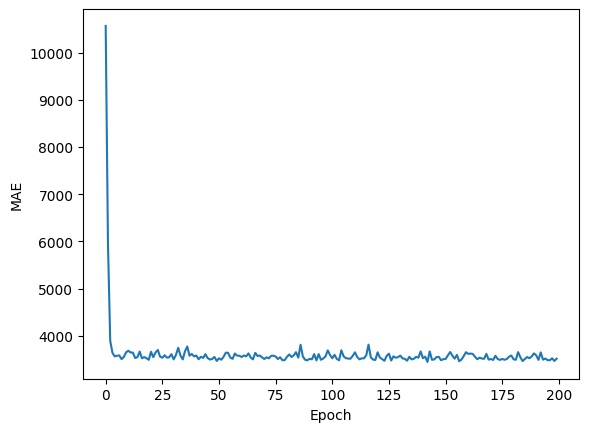

In [118]:
plt.plot(history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epoch')